# 🌟 **Image Classification with TensorFlow**

Welcome to the code implementation for image classification using TensorFlow! 🚀

This code demonstrates how to preprocess, train, evaluate, and improve deep learning models for classifying images. The project includes building and comparing multiple CNN architectures, identifying the best model, and addressing overfitting challenges.


## 👤 **Author Information**

- **Name**: Angelo Traverso
- **Module Code**: PDAN8412
- **Due Date**: 2024/11/18

## 🗂️ **Code Structure**

1. **Data Loading and Preprocessing**:  
   - Importing the dataset.  
   - Performing exploratory data analysis (EDA).  
   - Normalizing, augmenting, and splitting the data for training, validation, and testing.  

2. **Model Implementation**:  
   - Building baseline and improved CNN models.  
   - Configuring model layers, activation functions, and loss functions.  
   - Applying dropout and regularization to mitigate overfitting.  

3. **Training and Evaluation**:  
   - Training models on the dataset.  
   - Using metrics like accuracy, F1-score, and confusion matrices to evaluate performance.  
   - Addressing underfitting and overfitting with hyperparameter tuning.  

4. **Visualization and Insights**:  
   - Visualizing training and validation accuracy/loss curves.  
   - Generating confusion matrices and classification reports to interpret results.

4. **Pipelines**:  
   - Visualizing training and validation accuracy/loss curves.  
   - Generating confusion matrices and classification reports to interpret results.
   

---
## 📌 **Purpose of the Code**

The purpose of this code is to:  
- Demonstrate the process of building and refining CNN models for image classification.  
- Provide insights into model performance and generalization.  
- Explore strategies to address overfitting and improve accuracy.

## ❗ **Important to Note before you Begin**
Its important to ensure that all necessary libraries are installed:
- pyspark:      pip install pyspark
- seaborn:      pip install seaborn
- scikit-learn: pip install scikit-learn

- The model testing was only tested in Visual Studio Code and NOT Jupiter Notebook.
- This project was developed using Visual Studio Code.
- This project made use of Python Version 3.11.9.
- In-text referencing is applied to code that was used from an external source, the full bibliography entry is added to the accompanying document.

## 🏃‍♂️‍➡️ **Download and Run**
- Download the folder "AngeloTraverso_ST10081927_PDAN8412_POE"
- Unzip the folder
- Open Visual Studio > File > Open Folder/ Choose Folder > "AngeloTraverso_ST10081927_PDAN8412_POE"
- You can then choose to Run All or just run individual cells using the 'play' button next to each cell


### 🔗 **Dataset Information**

- **Dataset Name**: [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist)
- **Source**: Kaggle
- **Description**: This dataset contains pixelated grayscale images, where each image is a 28 x 28 image, each encorporating a total of 784 pixels

---

Let's get started by importing the necessary packages for this Image Classification task. Below, you'll find the detailed steps to clean and prepare the data for the Image Classification task! 🎉 🎉



In [114]:
# Imported TensorFlow library for deep learning functions and model training
import tensorflow as tf

# Imported ImageDataGenerator for augmenting and preprocessing image data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Imported Sequential for building a linear stack of layers in the neural network
from tensorflow.keras.models import Sequential

# Imported Dense for fully connected layers, Conv2D for convolutional layers, Flatten to flatten data for dense layers,
# MaxPooling2D for down-sampling, and Dropout to prevent overfitting in the neural network
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

# Imported Adam optimizer for optimizing the model's learning process
from tensorflow.keras.optimizers import Adam

# Imported EarlyStopping and ReduceLROnPlateau callbacks for controlling model training
# EarlyStopping stops training when the model stops improving, and ReduceLROnPlateau reduces learning rate when training plateaus
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Imported keras module from TensorFlow for building neural networks
from tensorflow.python import keras

# Imported to_categorical for converting labels to categorical one-hot encoding
from keras.utils import to_categorical

# Imported matplotlib.pyplot to visualize data and results in plots
import matplotlib.pyplot as plt

# Imported NumPy for handling arrays and performing numerical operations
import numpy as np

# Imported pandas for data manipulation and analysis, useful for loading and managing datasets
import pandas as pd

# Imported seaborn for statistical data visualization, often used for heatmaps and visual exploration of data
import seaborn as sns

# Imported load_model from Keras to load pre-trained models saved
from keras.models import load_model

# Imported ModelCheckpoint to save the model during training whenever a specified metric improves
from tensorflow.keras.callbacks import ModelCheckpoint

# Imported confusion_matrix for generating confusion matrices to evaluate classification models,
# and ConfusionMatrixDisplay for visualizing confusion matrices as plots
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Importing SparkSession to create a Spark session for distributed data processing
from pyspark.sql import SparkSession

# Importing for applying data augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing to apply L2 regularization to reduce overfitting.
from tensorflow.keras.regularizers import l2

# Importing to generate precision, recall, and F1-score results
from sklearn.metrics import classification_report


# **Spark Session**
---

In [115]:
# Initializing a SparkSession named 'fashionsession'
# The SparkSession is the entry point to programming with Spark as it allows you to create DataFrames, register DataFrames as tables, execute SQL queries, 
# and read data from various sources.
# (Chanda, 2024)
fashion_session = SparkSession.builder.appName("fashion_image_classification").config("spark.driver.memory", "8g").config("spark.executor.memory", "8g").getOrCreate()

In [116]:
# Retrieving the memory status size of all executors in the Spark application
# In this case, the output count of all executors is 1
fashion_session._jsc.sc().getExecutorMemoryStatus().size()

1

# **Retrieving Training and Test Data**
---

In [117]:
# Reading from the csv file and storing it all in a spark dataframe.
spark_train = fashion_session.read.option("header", True).format("csv").load("data\\fashion-mnist_train.csv")

# Reading from the csv file and storing it all in a spark dataframe.
spark_test = fashion_session.read.option("header", True).format("csv").load("data\\fashion-mnist_test.csv")

## **Ensuring Data Quality**
---

In [118]:
# Printing the schema of the dataframe, it outputs the structure of the DataFrame
# It outputs: columns names, data types, and feature elements
spark_train.printSchema()

# Displaying the first five entries from the dataframe
# This is done to ensure the data was read correctly, and all data is in its desired format
spark_train.show(5)

root
 |-- label: string (nullable = true)
 |-- pixel1: string (nullable = true)
 |-- pixel2: string (nullable = true)
 |-- pixel3: string (nullable = true)
 |-- pixel4: string (nullable = true)
 |-- pixel5: string (nullable = true)
 |-- pixel6: string (nullable = true)
 |-- pixel7: string (nullable = true)
 |-- pixel8: string (nullable = true)
 |-- pixel9: string (nullable = true)
 |-- pixel10: string (nullable = true)
 |-- pixel11: string (nullable = true)
 |-- pixel12: string (nullable = true)
 |-- pixel13: string (nullable = true)
 |-- pixel14: string (nullable = true)
 |-- pixel15: string (nullable = true)
 |-- pixel16: string (nullable = true)
 |-- pixel17: string (nullable = true)
 |-- pixel18: string (nullable = true)
 |-- pixel19: string (nullable = true)
 |-- pixel20: string (nullable = true)
 |-- pixel21: string (nullable = true)
 |-- pixel22: string (nullable = true)
 |-- pixel23: string (nullable = true)
 |-- pixel24: string (nullable = true)
 |-- pixel25: string (nullable 

In [119]:
# Printing the schema of the dataframe, it outputs the structure of the DataFrame
# It outputs: columns names, data types, and feature elements
spark_test.printSchema()

# Displaying the first five entries from the dataframe
# This is done to ensure the data was read correctly, and all data is in its desired format
spark_test.show(5)

root
 |-- label: string (nullable = true)
 |-- pixel1: string (nullable = true)
 |-- pixel2: string (nullable = true)
 |-- pixel3: string (nullable = true)
 |-- pixel4: string (nullable = true)
 |-- pixel5: string (nullable = true)
 |-- pixel6: string (nullable = true)
 |-- pixel7: string (nullable = true)
 |-- pixel8: string (nullable = true)
 |-- pixel9: string (nullable = true)
 |-- pixel10: string (nullable = true)
 |-- pixel11: string (nullable = true)
 |-- pixel12: string (nullable = true)
 |-- pixel13: string (nullable = true)
 |-- pixel14: string (nullable = true)
 |-- pixel15: string (nullable = true)
 |-- pixel16: string (nullable = true)
 |-- pixel17: string (nullable = true)
 |-- pixel18: string (nullable = true)
 |-- pixel19: string (nullable = true)
 |-- pixel20: string (nullable = true)
 |-- pixel21: string (nullable = true)
 |-- pixel22: string (nullable = true)
 |-- pixel23: string (nullable = true)
 |-- pixel24: string (nullable = true)
 |-- pixel25: string (nullable 

In [120]:
# Function to plot the distribution of classes in a dataset
# This function expects a dataframe and title text to be passed to it when its called
def plot_class_distribution(df, title):

    # Counting the occurrences of each class (label)
    class_counts = df.groupBy("label").count()

    # Converting the result to a Pandas DataFrame for easier plotting
    class_counts_pd = class_counts.toPandas()

    # Plot the class distribution using seaborn and matplotlib
    # Setting the figure size for the plot
    plt.figure(figsize=(8, 6))  
    # Creating a barplot for class distribution
    sns.barplot(x='label', y='count', data=class_counts_pd, palette='viridis') 
    # Setting the title of the plot
    plt.title(title)
    # Label the x-axis
    plt.xlabel('Class')
    # Label the y-axis  
    plt.ylabel('Count')
    # Display the plot
    plt.show()  

C:\Users\atrav\AppData\Local\Temp\ipykernel_23500\3618645660.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='count', data=class_counts_pd, palette='viridis')


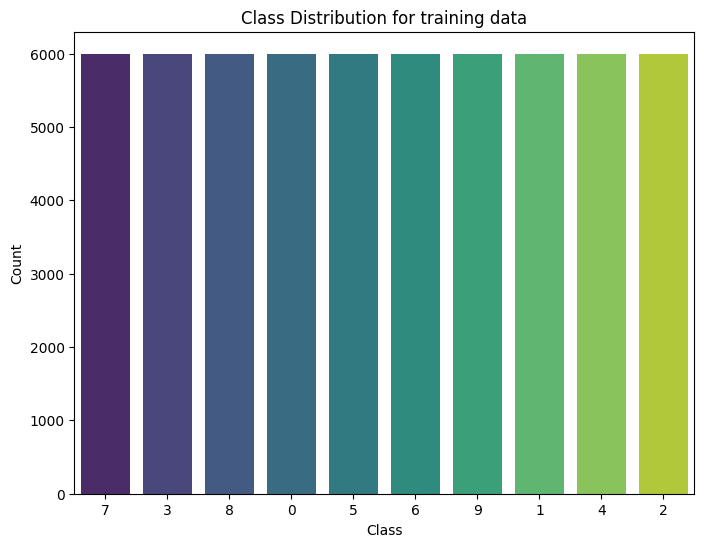

In [121]:
plot_class_distribution(spark_train, 'Class Distribution for training data')

C:\Users\atrav\AppData\Local\Temp\ipykernel_23500\3618645660.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='count', data=class_counts_pd, palette='viridis')


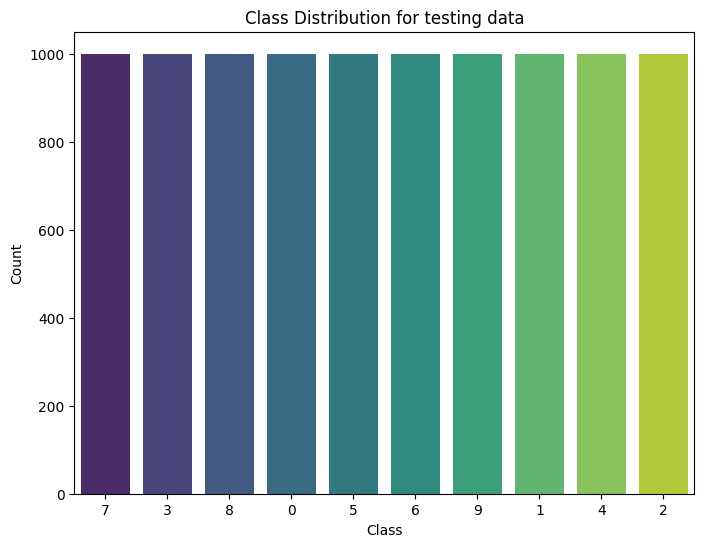

In [122]:
plot_class_distribution(spark_test, 'Class Distribution for testing data')

In [123]:
# Converting the training spark dataframe to a pandas dataframe
df_train = spark_train.toPandas()
# Converting the testing spark dataframe to a pandas dataframe
df_test = spark_test.toPandas()

In [124]:
# Making sure that all of the features are still in their correct format
# In this case, we can see that the dtypes are set to objects, they should be numerical values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: object(785)
memory usage: 359.3+ MB


In [125]:
# This is to double check the datatypes of each feature, which is confirmed to be objects
# This is a problem because each feature should be numerical
print(df_train.dtypes)

label       object
pixel1      object
pixel2      object
pixel3      object
pixel4      object
             ...  
pixel780    object
pixel781    object
pixel782    object
pixel783    object
pixel784    object
Length: 785, dtype: object


In [126]:
# Converting the data types of df_train and df_test to int32 for compatibility with the model
df_train = df_train.astype('int32')
df_test = df_test.astype('int32')

# Printing the data types of df_train to verify the conversion
print(df_train.dtypes)

# Printing the data types of df_test to verify the conversion
print(df_test.dtypes)

label       int32
pixel1      int32
pixel2      int32
pixel3      int32
pixel4      int32
            ...  
pixel780    int32
pixel781    int32
pixel782    int32
pixel783    int32
pixel784    int32
Length: 785, dtype: object
label       int32
pixel1      int32
pixel2      int32
pixel3      int32
pixel4      int32
            ...  
pixel780    int32
pixel781    int32
pixel782    int32
pixel783    int32
pixel784    int32
Length: 785, dtype: object


In [127]:
# Determining if there are any nulls after altering the data types of each freature
print(df_train.isnull().sum().sum())
print(df_test.isnull().sum().sum())


0
0


# **Data Pre-Processing**
---

In [128]:
# Function to preprocess raw data for model input
# (Becker, 2018)
def preprocess_data(raw_data):
    # Converting the labels into one-hot encoded formats with 10 categories
    out_y = to_categorical(raw_data.label, 10)

    # Retrieving the number of images (rows) in the dataset
    num_images = raw_data.shape[0]

    # Converting the dataset (excluding the label column) into a NumPy array
    x_as_array = raw_data.values[:, 1:]

    # Reshapeing the array into the format (num_images, 28, 28, 1) to match input shape for the model
    # Each image is 28x28 pixels, and the '1' indicates a single color channel (grayscale)
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)

    # Normalizing pixel values to the range [0, 1] by dividing by 255
    out_x = x_shaped_array / 255

    # Returning the processed input data (out_x) and the one-hot encoded labels (out_y)
    return out_x, out_y

In [129]:
# Preprocesses the training data using the preprocess_data function, 
# which normalizes pixel values and one-hot encodes the labels
x_train_prep, y_train_prep = preprocess_data(df_train)

# Preprocesses the test data using the preprocess_data function, 
# ensuring it is in the same format as the training data
x_test_prep, y_test_prep = preprocess_data(df_test)


# **Exploratory Data Analysis (EDA)**
---

In [130]:
# Function to plot a sample of images with their corresponding labels
def plot_sample_images(X, y, num_samples=10):
    # Setting the figure size for the plot
    plt.figure(figsize=(10, 5))
    # Looping through the specified number of samples
    for i in range(num_samples):
        # Creating a subplot for each sample
        plt.subplot(2, 5, i + 1)
        # Displaying the image at index i
        plt.imshow(X[i])
        # Setting the title to show the label of the image
        plt.title(f'Label: {y[i]}')
        # Removing axis lines for better visualization
        plt.axis('off')
    # Displaying the plot with all the samples
    plt.show()

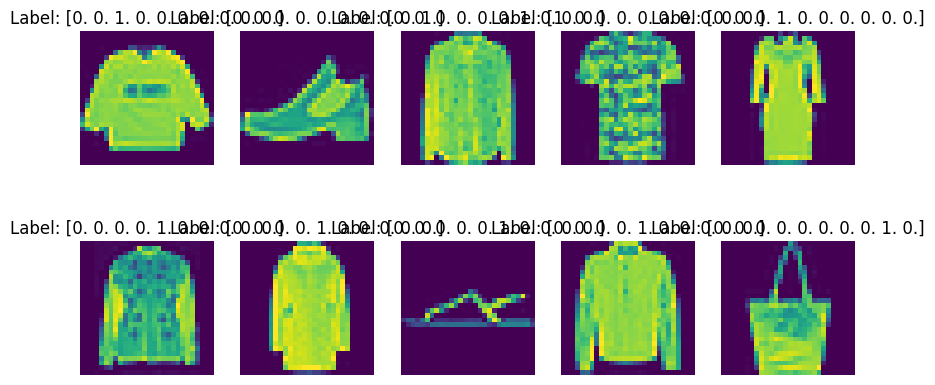

In [131]:
# Plotting random samples using the pipeline function created "plot_sample_images()", passing the newley created x_train_prep and y_train_prep
plot_sample_images(x_train_prep, y_train_prep)

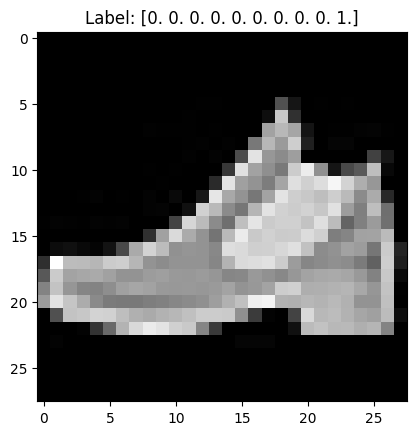

In [132]:
# Displaying a sample image
plt.imshow(x_train_prep[1].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train_prep[1]}")
plt.show()

# **Plots and Evaluation Pipelines**
---

In [133]:
# Function to plot the training and validation accuracy and loss over epochs
def plot_accuracy_loss(history, model_name):

    # Creating a figure with a specific size for the plot
    plt.figure(figsize=(14,5))
    
    # Plotting Accuracy
    # Creating a subplot for accuracy (1 row, 2 columns, first plot)
    plt.subplot(1, 2, 1)
    # Plotting training accuracy over epochs
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    # Plotting validation accuracy over epochs
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    # Title for the accuracy plot
    plt.title(f'{model_name} - Accuracy')
    # Label for the x-axis
    plt.xlabel('Epochs')
    # Label for the y-axis
    plt.ylabel('Accuracy')
    # Displaying a legend to differentiate between training and validation accuracy plots
    plt.legend()
    
    # Plotting Loss
    # Creating a subplot for loss (1 row, 2 columns, second plot)
    plt.subplot(1, 2, 2)
    # Plotting training loss over epochs
    plt.plot(history.history['loss'], label='Training Loss')
    # Plotting validation loss over epochs
    plt.plot(history.history['val_loss'], label='Validation Loss')
    # Setting the title for the loss plot
    plt.title(f'{model_name} - Loss')
    # Setting the X-axis label
    plt.xlabel('Epochs')
    # Setting the y-axis label
    plt.ylabel('Loss')
    # Displaying a legend to differentiate between training and validation loss
    plt.legend()
    
    # Displaying the plots
    plt.show()

In [134]:
def evaluate_model(model_path, x_test, y_test):
    """
    Evaluates the model by generating predictions on the test data and printing a classification report.

    Parameters:
    - model_path: Path to the saved model file.
    - x_test: Test dataset features.
    - y_test: True labels for the test dataset.

    Returns:
    - classification_report: A report detailing the performance of the model.
    """
    # Load the saved model
    loaded_model = load_model(model_path)
    print(f"Model loaded from {model_path}")

    # Generate predictions on the test data
    y_pred = loaded_model.predict(x_test).argmax(axis=1)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    return

In [135]:
"""
    Generating and plotting the confusion matrix for a given model and dataset.

    Parameters:
    - model: Trained model used for predictions.
    - x_test: Test dataset (features) for evaluation.
    - y_test: True labels for the test dataset.
    - class_names: List of class names corresponding to the labels.
    - title: Title of the confusion matrix plot (default: "Confusion Matrix").
    - cmap: Colormap for the plot (default: plt.cm.Blues).
    """
def plot_confusion_matrix(model, x_test, y_test, class_names, title="Confusion Matrix", cmap=plt.cm.Blues):

    # Converting y_test from one-hot encoding to class labels if needed
    # If y_test is one-hot encoded, convert it to class labels by taking the argmax
    if len(y_test.shape) > 1 and y_test.shape[1] > 1:
        y_test_labels = np.argmax(y_test, axis=1)  # Converting one-hot encoded labels to class labels
    else:
        y_test_labels = y_test # If already class labels, use as is

    # Predicting the class labels for the test set
    # Using the model to predict probabilities for each class
    y_pred_prob = model.predict(x_test)

    # Converting predicted probabilities to class labels by taking the argmax
    y_pred_labels = np.argmax(y_pred_prob, axis=1)

    # Generating the confusion matrix
    # Creating a confusion matrix comparing true labels (y_test_labels) and predicted labels (y_pred_labels)
    cm = confusion_matrix(y_test_labels, y_pred_labels)

    # Plotting the confusion matrix
    # Creating a confusion matrix display object with labels corresponding to the class names
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    # Plotting the confusion matrix with a specified color map and optional rotation for x-axis labels
    disp.plot(cmap=cmap, xticks_rotation=45)

    # Setting the title for the plot
    plt.title(title)

    # Displaying the plot
    plt.show()

In [136]:
# List of class names corresponding to the categories in the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [137]:
def visualize_dataset_sizes(original_size, augmented_size):
    """
    A function to Visualize the comparison between original dataset size and augmented dataset size.

    Parameters:
    - original_size: The size of the original dataset (int).
    - augmented_size: The size of the augmented dataset (int).
    """
    # Defining labels for the dataset types
    labels = ['Original Dataset', 'Augmented Dataset']
    # Defining the sizes corresponding to the dataset types
    sizes = [original_size, augmented_size]

    # Creating a new figure for the bar chart with specified dimensions
    plt.figure(figsize=(8, 5))
    # Plotting a bar chart with dataset sizes and color distinction
    plt.bar(labels, sizes, color=['blue', 'orange'])
    
    # Setting the label for the x-axis
    plt.xlabel("Dataset Type")
    # Setting the label for the y-axis
    plt.ylabel("Number of Samples")
    # Setting the title text of the visualization
    plt.title("Original vs Augmented Dataset Size")
    
    # Annotating each bar with the corresponding size value
    # (Weitz, 2020)
    for i, size in enumerate(sizes):
        # Placing the size value above the bar
        plt.text(i, size + 100, str(size), ha='center', fontsize=12)

    # Adjusting the layout to prevent overlapping
    plt.tight_layout()
    # Displaying the bar chart
    plt.show()


# **Model Functions**
---

In [138]:
# Function to build the base model for comparison
def build_base_model():
    # Initializing a Sequential model
    basic_cnn = Sequential([
    # Adding a 2D convolutional layer with 32 filters, a kernel size of (3x3), ReLU activation,
    # and input shape of (28, 28, 1) representing grayscale images (28x28 pixels)
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    # Adding a max pooling layer with pool size (2x2) to reduce spatial dimensions
    MaxPooling2D(2,2),
    # Adding another convolutional layer with 64 filters and a kernel size of (3x3), ReLU activation
    Conv2D(64, (3,3), activation='relu'),
    # Adding another max pooling layer to further reduce the spatial dimensions
    MaxPooling2D(2,2),
    # Flattenning the output to a 1D vector for input into the dense layers
    Flatten(),
    # Added a fully connected dense layer with 128 units and ReLU activation
    Dense(128, activation='relu'),
    # Added the output layer with 10 units (one for each class) and softmax activation for multi-class classification
    Dense(10, activation='softmax')
])
    # Compiling the model using the Adam optimizer, categorical crossentropy loss, 
    # and accuracy as the evaluation metric
    basic_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Returning the model
    return basic_cnn


In [139]:
"""
    Building a CNN model with added regularization and a custom learning rate.

    Parameters:
    - learning_rate: The rate at which the model will learn from the training data
    """
def build_second_model(learning_rate):
    # Initializing a Sequential model for the second CNN
    second_cnn_model = Sequential([
    # Added a 2D convolutional layer with 32 filters, a kernel size of (3x3), ReLU activation,
    # and L2 regularization (lambda=0.01) for weight decay. The input shape is (28, 28, 1).
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(28, 28, 1)),
    # Added a max pooling layer with pool size (2x2) to reduce spatial dimensions
    MaxPooling2D(pool_size=(2, 2)),
    # Added a second convolutional layer with 64 filters and ReLU activation,
    # along with L2 regularization
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    # Added another max pooling layer to reduce the spatial dimensions further
    MaxPooling2D(pool_size=(2, 2)),
    # Added a third convolutional layer with 128 filters and ReLU activation,
    # along with L2 regularization
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    # Added a final max pooling layer
    MaxPooling2D(pool_size=(2, 2)),
    # Flattenning the output from 2D to 1D, so it can be fed into the fully connected layers
    Flatten(),
    # Added a fully connected dense layer with 128 units, ReLU activation, and L2 regularization
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    # Added the output layer with 10 units (one for each class) and softmax activation for multi-class classification
    Dense(10, activation='softmax')
])
    # Defining the Adam optimizer with the provided learning rate
    optimizer = Adam(learning_rate = learning_rate)
    # Compiling the model using sparse categorical crossentropy loss and accuracy as the evaluation metric
    # Categorical crossentropy is used because the labels are one-hot encoded.
    second_cnn_model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Returning the compiled model
    return second_cnn_model

In [140]:
"""
    Building an improved CNN model with a custom dropout rate and learning rate.

    Parameters:
    - dropout_rate: the fraction of data to set to 0 during training to reduce overfitting
    - learning_rate: the rate at which the model will learn from the training data
    """
def build_improved_model(dropout_rate, learning_rate):
    # Initializing a Sequential model for the improved CNN model
    improved_cnn_model = Sequential()
    # Added a 2D convolutional layer with 32 filters, a kernel size of (3x3), ReLU activation,
    # and strides of 2 (down-sampling the input). The input shape is (28, 28, 1).
    improved_cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', strides=2, input_shape=(28, 28, 1)))
    # Added a dropout layer with the specified dropout rate to reduce overfitting by randomly
    # setting a fraction of input units to 0 during training.
    improved_cnn_model.add(Dropout(rate=dropout_rate))
    # Added a second convolutional layer with 64 filters, a kernel size of (3x3), ReLU activation,
    # and strides of 2 for down-sampling the feature maps further.
    improved_cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', strides=2))
    # Added another dropout layer to help prevent overfitting.
    improved_cnn_model.add(Dropout(rate=dropout_rate))
    # Flattenning the output from 2D (feature maps) to 1D (for input into dense layers).
    improved_cnn_model.add(Flatten())
    # Added a fully connected dense layer with 128 units and ReLU activation.
    improved_cnn_model.add(Dense(64, activation='relu'))
    # Added the output layer with 10 units (one for each class), using softmax activation
    # for multi-class classification to output probabilities.
    improved_cnn_model.add(Dense(10, activation='softmax'))

    # Defining the Adam optimizer with the provided learning rate
    optimizer = Adam(learning_rate = learning_rate)
    # Compiling the model using categorical crossentropy loss and accuracy as the evaluation metric.
    # Categorical crossentropy is used because the labels are one-hot encoded.
    improved_cnn_model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    # Returning the model
    return improved_cnn_model

# **Training Functions**
---

In [141]:
"""
    Defining a function to both train and save the base model

    Parameters:
    - model: Trained model used for predictions.
    - x_train: Train dataset (features) for evaluation.
    - y_train: True labels for the train dataset.
    - model_name: The name of the file that the model will be saved to
    - epochs: the number of epochs for the model to train on
    - batch_size: The size of each batch
    Returns:
    - history: Training history object.
    """
def train_and_save_base(model, x_train, y_train, model_name, epochs, batch_size):
    # Training the model on the training data (x_train, y_train)
    # The model is trained for the specified number of epochs with the given batch size
    # validation_split=0.2 reserves 20% of the training data for validation during training

    history = model.fit(
        x_train, y_train,
        epochs=epochs,          # Number of epochs
        batch_size=batch_size,  # Size of each batch of data fed into the model
        validation_split=0.2,   # Reserving 20% of the training data for validation
    )

    # Saving the trained model to a file with the given model name in .keras format
    model.save(f"{model_name}.keras")
    # Displaying the model architecture summary, which includes details about layers, output shapes, and parameters
    model.summary()
    # Returning the training history object, which contains information about the training process (e.g., loss and accuracy over epochs)
    return history

In [142]:
"""
    Defining a function to both train and save the second CNN model

    Parameters:
    - model: Trained model used for predictions.
    - x_train: Train dataset (features) for evaluation.
    - y_train: True labels for the train dataset.
    - x_test: Test dataset (features) for evaluation.
    - y_test: True labels for the test dataset.
    - model_name: The name of the file that the model will be saved to
    - epochs: the number of epochs for the model to train on
    - batch_size: The size of each batch
    Returns:
    - history: Training history object.
    """
def train_and_save_second(model, x_train, y_train, x_test, y_test, model_name, epochs, batch_size):
    
    # Early stopping to prevent overfitting by monitoring the validation loss.
    # If the validation loss does not improve for 'patience' epochs, training will stop.
    early_stopping_second = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    # Reduce learning rate on plateau: if validation loss doesn't improve, the learning rate is reduced by a factor of 'factor'
    # for 'patience' epochs. This helps the model converge more effectively.
    reduce_lr_second = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
    # Training the model on the training data (x_train, y_train)
    # 'steps_per_epoch' specifies how many batches to process per epoch
    # 'validation_data' is used to evaluate the model on unseen data after each epoch
    # 'callbacks' includes early stopping and learning rate reduction to improve training stability
    history = model.fit(
        x_train, y_train,                   
        epochs=epochs,                                          # Number of epochs to train the model
        batch_size=batch_size,                                  # Batch size for training
        validation_data=(x_test, y_test),                       # Validation data to evaluate the model after each epoch
        callbacks=[early_stopping_second, reduce_lr_second],    # Callback functions for early stopping and learning rate reduction
    )
    # Saving the trained model in .keras format
    model.save(f"{model_name}.keras")
    # Displaying the model architecture summary
    model.summary()

    # Returning the training history for further analysis (e.g., to plot accuracy/loss)
    return history


In [143]:
"""
    Defining a function to both train and save the improved CNN model

    Parameters:
    - model: Trained model used for predictions.
    - x_train: Train dataset (features) for evaluation.
    - y_train: True labels for the train dataset.
    - x_test: Test dataset (features) for evaluation.
    - y_test: True labels for the test dataset.
    - model_name: The name of the file that the model will be saved to
    - epochs: the number of epochs for the model to train on
    - batch_size: The size of each batch
    Returns:
    - history: Training history object.
    """
def train_and_save_improved(model,x_train, y_train, x_test, y_test, model_name, epochs, batch_size):
    # Early stopping to prevent overfitting by monitoring the validation loss.
    # If the validation loss does not improve for 'patience' epochs, training will stop.
    early_stopping_improved = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    # Reducing learning rate on plateau: if validation loss doesn't improve, the learning rate is reduced by a factor of 'factor'
    # for 'patience' epochs. This helps the model converge more effectively.
    reduce_lr_improved = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
    
    # Model checkpoint callback to save the best model (with the lowest validation loss)
    # The model is saved in the .keras format only if the validation loss improves.
    # (Brownlee, 2016)
    checkpoint = ModelCheckpoint(
        filepath=f"{model_name}_best.keras",
        monitor='val_loss',
        save_best_only=True,  # Save only the best weights
        mode='min',  # Save when `val_loss` decreases
        verbose=1
    )
    
    # Training the model on the training data (x_train, y_train)
    # The 'epochs' and 'batch_size' define how many epochs to run and the batch size for each training step
    # 'validation_data' is used to evaluate the model after each epoch using the test data (x_test, y_test)
    # 'callbacks' includes early stopping and learning rate reduction to improve training stability
    history = model.fit(
        x_train, y_train,
        epochs=epochs,                                                          # Number of epochs to train the model
        batch_size=batch_size,                                                  # Batch size for training
        validation_data=(x_test, y_test),                                       # Validation data to evaluate the model after each epoch
        callbacks=[early_stopping_improved, reduce_lr_improved, checkpoint],    # Callback functions for early stopping, learning rate reduction and model checkpoints
    )
     # Saving the trained model in .keras format
    model.save(f"{model_name}.keras")

    # Displaying the model architecture summary to show details like the number of parameters and layer configurations
    model.summary()

    # Returning the training history object which includes loss and accuracy metrics for training and validation
    return history

In [144]:
import math
"""
    Defining a function to both train and save the improved CNN model

    Parameters:
    - model: Trained model used for predictions.
    - x_train: Train dataset (features) for evaluation.
    - y_train: True labels for the train dataset.
    - x_test: Test dataset (features) for evaluation.
    - y_test: True labels for the test dataset.
    - model_name: The name of the file that the model will be saved to
    - epochs: the number of epochs for the model to train on
    - batch_size: The size of each batch
    Returns:
    - history: Training history object.
    """
def train_and_save_improvedV2(model, x_train, y_train, x_test, y_test, model_name, epochs, batch_size, augmentation_params=None, max_samples=150000):
    # Early stopping to prevent overfitting by monitoring the validation loss (val_loss)
    # If val_loss doesn't improve for 'patience' epochs, training will stop.
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    # Reduce learning rate when validation loss stops improving by a factor of '0.2' 
    # for 'patience' epochs. This helps the model to converge better.
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
    
    # Model checkpoint callback to save the best model (with the lowest validation loss)
    # The model is saved in the .keras format only if the validation loss improves.
    # (Brownlee, 2016)
    checkpoint = ModelCheckpoint(
        filepath=f"{model_name}_best.keras", # Filepath for saving the best model
        monitor='val_loss', # Metric to monitor during training
        save_best_only=True, # Save only the best-performing model
        mode='min',  # Look for minimum validation loss
        verbose=1 # Print updates during the saving process
    )

    # Checking to see if data augmentation is enabled
    if augmentation_params:
   
        # Creating the ImageDataGenerator for data augmentation using provided parameters
        datagen = ImageDataGenerator(**augmentation_params)

        # Calculating the total number of samples to ensure it does not exceed the maximum allowed
        total_samples = min(max_samples, len(x_train) * epochs)  # Limitting total samples to max_samples
        # Determining the number of steps per epoch to distribute the samples
        steps_per_epoch = math.ceil(total_samples / batch_size)

        # Adjusting the steps per epoch if the calculated samples exceed the max_samples limit
        adjusted_samples = steps_per_epoch * batch_size * epochs # Calculating total samples based on steps
        if adjusted_samples > max_samples:
            print(f"Warning: Adjusted steps to meet the max_samples limit of {max_samples}")
            # Recalculating steps to fit within max_samples
            steps_per_epoch = max_samples // (batch_size * epochs)

        # Creating a data generator for augmented training data
        train_generator = datagen.flow(
            x_train, y_train, batch_size=batch_size, shuffle=True # Enabling shuffling for better training
        )

        # Training the model using the augmented data generator
        history = model.fit(
            train_generator,  # Passing the generator for training
            steps_per_epoch=steps_per_epoch, # Using adjusted steps per epoch
            epochs=epochs, # Number of training epochs
            validation_data=(x_test, y_test), # Validation data for evaluating performance
            callbacks=[early_stopping, reduce_lr, checkpoint], # Added callbacks for monitoring and saving
            verbose=1 
        )

        # Calculating and printing the total augmented samples used during training
        augmented_size = steps_per_epoch * batch_size * epochs
        print(f"Training samples after augmentation: {augmented_size}")
        
    else:
        # Train the model without augmentation
        # Train the model without any data augmentation
        history = model.fit(
            x_train, y_train,  # Training data
            epochs=epochs,  # Number of training epochs
            batch_size=batch_size,  # Batch size for training
            validation_data=(x_test, y_test),  # Validation data for performance evaluation
            callbacks=[early_stopping, reduce_lr, checkpoint],  # Add callbacks for monitoring and saving
            verbose=1  # Print training progress
        )

    # Saving the trained model
    model.save(f"{model_name}.keras")
    print(f"Model saved as {model_name}.keras")

    # Visualizing the original vs augmented sizes
    # Getting the original dataset size
    original_size = x_train.shape[0]
    # Calling the visualize dataset sizes function to visualize the difference between augmented and non augmented data sizes
    visualize_dataset_sizes(original_size, augmented_size)
    
    # Returning the model's history
    return history

# **Model Pipelines**
---

In [145]:
"""
    Defining a pipeline function for each model. 
    Each pipeline function handles the model creation and training.
    Once the model is completed training, 2 objects are returned, the model and the model's history.

    Parameters:
    - model: Trained model used for predictions.
    - x_train: Train dataset (features) for evaluation.
    - y_train: True labels for the train dataset.
    - x_test: Test dataset (features) for evaluation.
    - y_test: True labels for the test dataset.
    - model_name: The name of the file that the model will be saved to
    - epochs: the number of epochs for the model to train on
    - batch_size: The size of each batch
    - learning_rate: The rate at which the model will learn from the training data
    - dropout_rate: The fraction of data to set to 0 during training to reduce overfitting
    """
# Pipeline for training the base CNN model
def base_cnn_Pipeline(x_train, y_train,model_name, epochs, batch_size):
    # Building the base CNN model
    model = build_base_model()
    # Training the model and saving it
    history = train_and_save_base(model, x_train, y_train,model_name, epochs, batch_size)
    # Returning the trained model and its training history
    return model, history

def second_cnn_Pipeline(x_train, y_train, x_test, y_test, model_name, epochs, batch_size, learning_rate):
    # Building the second CNN model
    model = build_second_model(learning_rate)
    # Training the model and saving it
    history = train_and_save_second(model, x_train, y_train, x_test, y_test, model_name, epochs, batch_size)
    # Returning the trained model and its training history
    return model, history

def improved_cnn_Pipeline(x_train, y_train, x_test, y_test, model_name, epochs, batch_size, dropout_rate, learning_rate):
    # Building the improved CNN model
    model = build_improved_model(dropout_rate, learning_rate)
    # Training the model and saving it
    history = train_and_save_improved(model, x_train, y_train, x_test, y_test, model_name, epochs, batch_size)
    # Returning the trained model and its training history
    return model, history

def improved_cnn_PipelineV2(x_train, y_train, x_test, y_test, model_name, epochs, batch_size, dropout_rate, learning_rate, augmented_params):
    # Building the improved CNN model V2
    model = build_improved_model(dropout_rate, learning_rate)
    # Training the model and saving it
    history = train_and_save_improvedV2(model, x_train, y_train, x_test, y_test, model_name, epochs, batch_size, augmented_params)
    # Returning the trained model and its training history
    return model, history

# **Model Training and Visualization**
---

In [146]:
# The number of epochs the model uses to train on
epochs = 10
# The number of samples processed before the model is updated
batch_size = 64

# Training the base CNN model using the pipeline function, passing the training data, model name, epochs, and batch size
base_model, base_history = base_cnn_Pipeline(x_train_prep, y_train_prep, 'Base_CNN_Model', epochs, batch_size)

c:\Users\atrav\anaconda3\envs\pdan_part1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7411 - loss: 0.7281 - val_accuracy: 0.8604 - val_loss: 0.3814
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8701 - loss: 0.3568 - val_accuracy: 0.8891 - val_loss: 0.3097
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8868 - loss: 0.3027 - val_accuracy: 0.8944 - val_loss: 0.2866
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9036 - loss: 0.2603 - val_accuracy: 0.8985 - val_loss: 0.2864
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9154 - loss: 0.2321 - val_accuracy: 0.9044 - val_loss: 0.2660
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9219 - loss: 0.2109 - val_accuracy: 0.9093 - val_loss: 0.2593
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9297 - loss: 0.1887 - val_accuracy: 0.8985 - val_loss: 0.2857
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9388 - loss: 0.1667 - val_accuracy: 0.

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [148]:
# Checking if y_test_prep has more than one dimension (i.e., one-hot encoded labels)
if len(y_test_prep.shape) > 1:
    # Converting one-hot encoded labels into single integer class labels by taking the index of the max value
    y_test_prep = y_test_prep.argmax(axis=1)

# Checking if y_train_prep has more than one dimension (i.e., one-hot encoded labels)
if len(y_train_prep.shape) > 1:
    # Converting one-hot encoded labels into single integer class labels by taking the index of the max value
    y_train_prep = y_train_prep.argmax(axis=1)
    
# Reapplying the same check and conversion for y_test_prep in case it was not converted in the first condition
y_test_prep = y_test_prep.argmax(axis=1) if len(y_test_prep.shape) > 1 else y_test_prep

In [149]:
# Calling the evaluate model function to determine and print the classification report for a given model
evaluate_model("Base_CNN_Model.keras", x_test_prep, y_test_prep)

Model loaded from Base_CNN_Model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.91      0.83      0.87      1000
           3       0.94      0.92      0.93      1000
           4       0.86      0.90      0.88      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.79      0.76      1000
           7       0.96      0.95      0.95      1000
           8       0.98      0.99      0.99      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



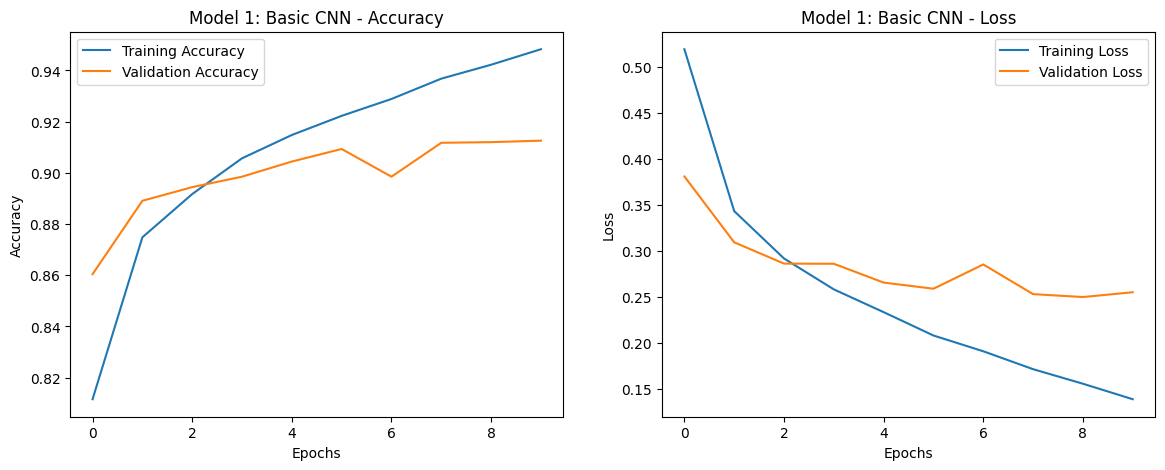

In [150]:
# Using the plot_accuracy_loss pipeline function to display the accuracy and loss of the model
plot_accuracy_loss(base_history, 'Model 1: Basic CNN')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


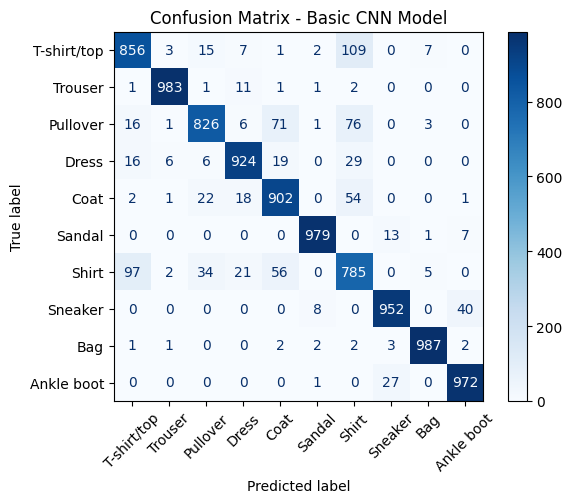

In [169]:
# Calling the plot_confusion_matrix function to visualize the model's performance on the test data
plot_confusion_matrix(
    model=base_model,                           # The trained base CNN model that will make predictions
    x_test=x_test_prep,                         # The prepared test data (input features)
    y_test=y_test_prep,                         # The true labels for the test data
    class_names=class_names,                    # List of class labels corresponding to each predicted class
    title="Confusion Matrix - Basic CNN Model" # Title of the confusion matrix plot
)

### **Second Model**

In [152]:
print(y_test_prep.shape)  # Should be (num_samples,)
print(y_test_prep[:5])    # Should contain integer labels like [0, 1, 2, ...]

(10000,)
[0 1 2 2 3]


In [153]:
# Checking if y_test_prep has more than one dimension (i.e., one-hot encoded labels)
if len(y_test_prep.shape) > 1:
    # Converting one-hot encoded labels into single integer class labels by taking the index of the max value
    y_test_prep = y_test_prep.argmax(axis=1)

# Checking if y_train_prep has more than one dimension (i.e., one-hot encoded labels)
if len(y_train_prep.shape) > 1:
    # Converting one-hot encoded labels into single integer class labels by taking the index of the max value
    y_train_prep = y_train_prep.argmax(axis=1)
    
# Reapplying the same check and conversion for y_test_prep in case it was not converted in the first condition
y_test_prep = y_test_prep.argmax(axis=1) if len(y_test_prep.shape) > 1 else y_test_prep

In [154]:
# Confirming changing have been successfully applied
print(x_train_prep.shape)
print(y_train_prep.shape)
print(y_train_prep.shape)
print(y_test_prep.shape)
print(y_test_prep[:5]) 

(60000, 28, 28, 1)
(60000,)
(60000,)
(10000,)
[0 1 2 2 3]


In [155]:
# Variables to hold values for learning rate, batch size and number of epochs
learning_rate = 0.001
batch_size = 128
epochs = 50

# Training the second CNN model using the pipeline function, passing the training data, testing data, model name, epochs, batch size, and learning rate
second_model, second_model_history = second_cnn_Pipeline(x_train_prep, y_train_prep, x_test_prep, y_test_prep, 'Second_CNN_Model', epochs, batch_size, learning_rate)

c:\Users\atrav\anaconda3\envs\pdan_part1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5864 - loss: 2.1070 - val_accuracy: 0.7567 - val_loss: 1.0216 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7688 - loss: 0.9733 - val_accuracy: 0.7924 - val_loss: 0.8626 - learning_rate: 0.0010
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7803 - loss: 0.8651 - val_accuracy: 0.7717 - val_loss: 0.8610 - learning_rate: 0.0010
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7870 - loss: 0.8205 - val_accuracy: 0.7846 - val_loss: 0.8288 - learning_rate: 0.0010
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7909 - loss: 0.7988 - val_accuracy: 0.8029 - val_loss: 0.7669 - learning_rate: 0.0010
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7968 - loss: 0.7729 - val_accuracy: 0.7943 - val_loss: 0.7680 - learning_rate: 0.0010
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7959 - loss: 0.

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,424 (1.26 MB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 220,950 (863.09 KB)

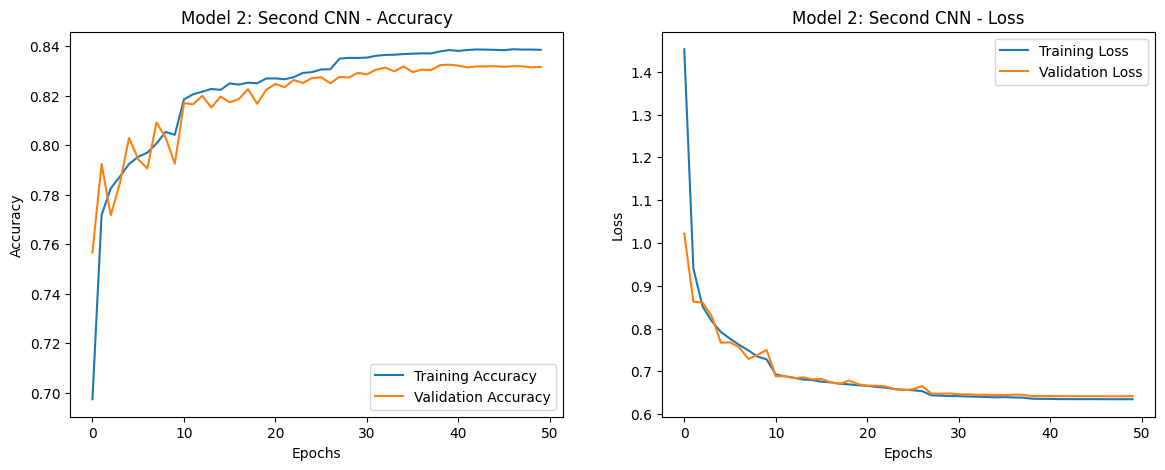

In [156]:
# Using the plot_accuracy_loss pipeline function to display the accuracy and loss of the model
plot_accuracy_loss(second_model_history, 'Model 2: Second CNN')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


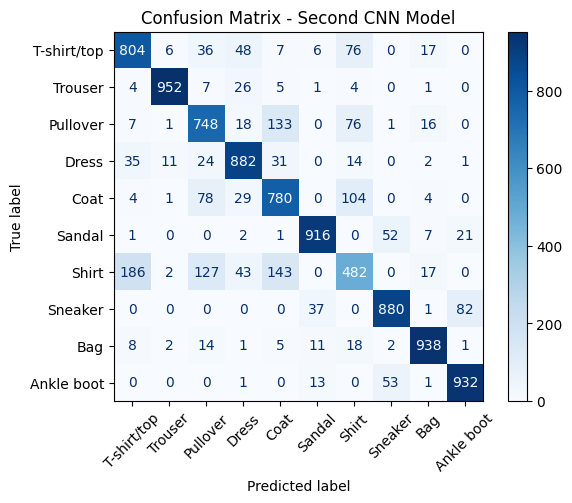

In [157]:
# Calling the plot_confusion_matrix function to generate and visualize the confusion matrix
plot_confusion_matrix(
    model=second_model,  # The trained model to evaluate (in this case, the second CNN model)
    x_test=x_test_prep,  # The preprocessed test features (input data) for evaluation
    y_test=y_test_prep,  # The true labels for the test data, in integer format (not one-hot encoded)
    class_names=class_names,  # List of class names corresponding to the integer labels
    title="Confusion Matrix - Second CNN Model"  # Title for the plot to describe which model the matrix corresponds to
)

In [158]:
# Calling the evaluate model function to determine and print the classification report for a given model
evaluate_model("Second_CNN_Model.keras", x_test_prep, y_test_prep)

Model loaded from Second_CNN_Model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1000
           1       0.98      0.95      0.96      1000
           2       0.72      0.75      0.74      1000
           3       0.84      0.88      0.86      1000
           4       0.71      0.78      0.74      1000
           5       0.93      0.92      0.92      1000
           6       0.62      0.48      0.54      1000
           7       0.89      0.88      0.89      1000
           8       0.93      0.94      0.94      1000
           9       0.90      0.93      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



***Improved Model***

In [159]:
# Resetting the index of the training and test DataFrames
df_train.reset_index()  # Resetting the index of the training DataFrame
df_test.reset_index()  # Resetting the index of the test DataFrame

# Preprocessing the data for training and testing
# This process is done again to ensure data integrity
x_train_improved, y_train_improved = preprocess_data(df_train)
x_test_improved, y_test_improved = preprocess_data(df_test)

In [160]:
# Setting hyperparameters for training the improved CNN model
epochs = 100  # The number of epochs (iterations over the entire dataset) for training the model
dropout = 0.5  # The dropout rate
batch_size = 128  # The number of samples processed before the model is updated
learning_rate = 0.0001  # The learning rate for the optimizer, which controls how much the model weights are adjusted during training

# Training the improved CNN model using the pipeline function, passing the training data, testing data, model name, epochs, batch size, and learning rate
improved_model, improved_model_history = improved_cnn_Pipeline(x_train_improved, y_train_improved, x_test_improved, y_test_improved, 'Improved_CNN_Model', epochs, batch_size, dropout, learning_rate)

c:\Users\atrav\anaconda3\envs\pdan_part1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4296 - loss: 1.6123
Epoch 1: val_loss improved from inf to 0.67089, saving model to Improved_CNN_Model_best.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4313 - loss: 1.6074 - val_accuracy: 0.7611 - val_loss: 0.6709 - learning_rate: 1.0000e-04
Epoch 2/100
463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7402 - loss: 0.7174
Epoch 2: val_loss improved from 0.67089 to 0.57567, saving model to Improved_CNN_Model_best.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7403 - loss: 0.7170 - val_accuracy: 0.7974 - val_loss: 0.5757 - learning_rate: 1.0000e-04
Epoch 3/100
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7676 - loss: 0.6333
Epoch 3: val_loss improved from 0.57567 to 0.53978, saving model to Improved_CNN_Model_best.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7676 - loss: 0.6331 - val_accuracy: 0.8054 - val_loss: 0.5398 - learning_rate: 1.0000e-04
Epoch 4/100
46

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 13, 13, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,960 (1.91 MB)

 Trainable params: 166,986 (652.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 333,974 (1.27 MB)

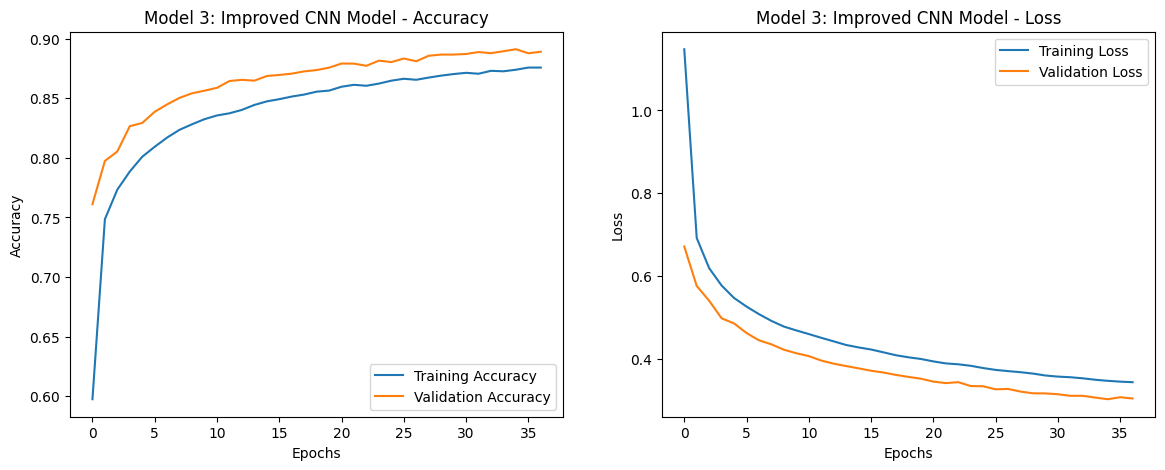

In [161]:
# Using the plot_accuracy_loss pipeline function to display the accuracy and loss of the model
plot_accuracy_loss(improved_model_history, 'Model 3: Improved CNN Model')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


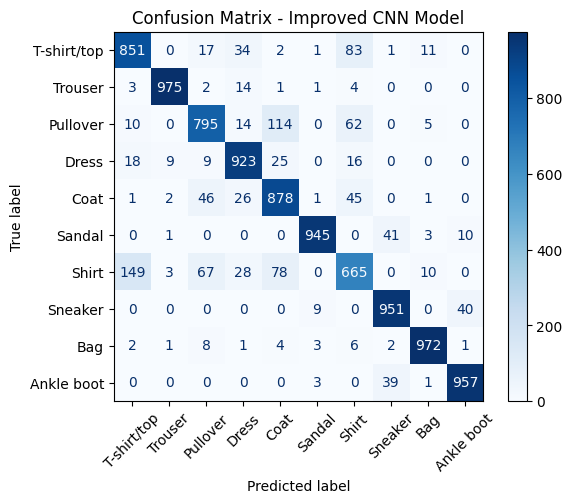

In [162]:
plot_confusion_matrix(
    model=improved_model, # The trained model to evaluate (in this case, the second CNN model)
    x_test=x_test_improved, # The preprocessed test features (input data) for evaluation
    y_test=y_test_improved, # The true labels for the test data, in integer format (not one-hot encoded)
    class_names=class_names, # List of class names corresponding to the integer labels
    title="Confusion Matrix - Improved CNN Model" # Title for the plot to describe which model the matrix corresponds to
)

In [163]:
# Calling the evaluate model function to determine and print the classification report for a given model
evaluate_model("Improved_CNN_Model.keras", x_test_prep, y_test_prep)

Model loaded from Improved_CNN_Model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.84      0.80      0.82      1000
           3       0.89      0.92      0.90      1000
           4       0.80      0.88      0.84      1000
           5       0.98      0.94      0.96      1000
           6       0.75      0.67      0.71      1000
           7       0.92      0.95      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### **Imporved CNN Model V2**

Epoch 1/50


c:\Users\atrav\anaconda3\envs\pdan_part1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/93 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1055 - loss: 2.2962

c:\Users\atrav\anaconda3\envs\pdan_part1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/93 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2576 - loss: 1.9825
Epoch 1: val_loss improved from inf to 1.02552, saving model to Improved_CNN_ModelV2_best.keras
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2603 - loss: 1.9759 - val_accuracy: 0.6411 - val_loss: 1.0255 - learning_rate: 0.0010
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5516 - loss: 1.1909
Epoch 2: val_loss improved from 1.02552 to 0.80524, saving model to Improved_CNN_ModelV2_best.keras
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5518 - loss: 1.1902 - val_accuracy: 0.7130 - val_loss: 0.8052 - learning_rate: 0.0010
Epoch 3/50
88/93 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6083 - loss: 1.0552
Epoch 3: val_loss improved from 0.80524 to 0.79448, saving model to Improved_CNN_ModelV2_best.keras
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6092 - loss: 1.0531 - val_accuracy: 0.6915 - val_loss: 0.7945 - learning_rate: 0.0010
Epoch 4/50
90/93 ━━━━━━━━━━━━━━━━━━━━ 0s

c:\Users\atrav\anaconda3\envs\pdan_part1\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 21: val_loss did not improve from 0.56154
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7142 - loss: 0.7264 - val_accuracy: 0.7719 - val_loss: 0.5656 - learning_rate: 4.0000e-05
Training samples after augmentation: 148800
Model saved as Improved_CNN_ModelV2.keras


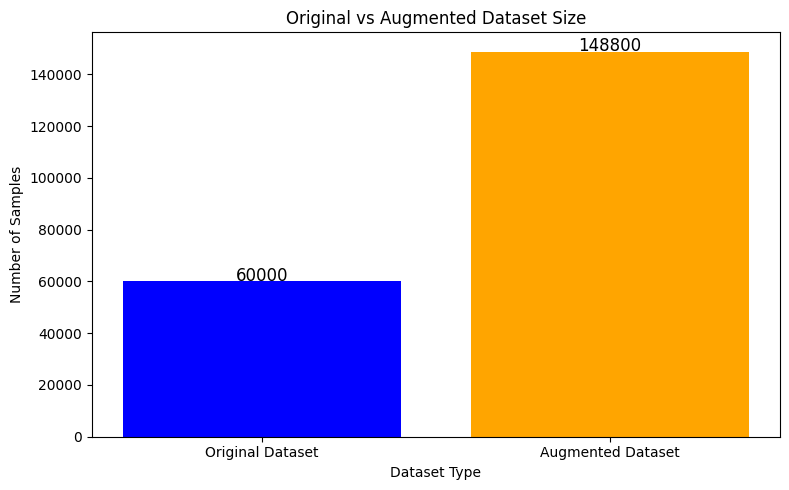

In [164]:
# Setting hyperparameters for training the improved CNN modelV2
dropout_rate = 0.5  # The dropout rate (20%) applied during training to prevent overfitting by randomly deactivating a fraction of neurons in each layer
learning_rate = 0.001  # The learning rate controls how much the model's weights are adjusted during training, with a higher value speeding up convergence
epochs = 50  # The number of epochs for training the model
batch_size = 32  # The number of samples the model will process before updating the weights, a batch size of 64

augmentation_params = {
    'rotation_range': 15,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1,
    'zoom_range': 0.1,
    'horizontal_flip': True
}
# Training the improved CNN modelV2 using the pipeline function, passing the training data, testing data, model name, epochs, batch size, and learning rate
improved_modelV2, improved_model_historyV2 = improved_cnn_PipelineV2(x_train_improved, y_train_improved, x_test_improved, y_test_improved, 'Improved_CNN_ModelV2', epochs, batch_size, dropout_rate, learning_rate, augmentation_params)


In [165]:
# Calling the evaluate model function to determine and print the classification report for a given model
evaluate_model("Improved_CNN_ModelV2.keras", x_test_prep, y_test_prep)

Model loaded from Improved_CNN_ModelV2.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1000
           1       0.93      0.96      0.94      1000
           2       0.55      0.74      0.63      1000
           3       0.75      0.85      0.80      1000
           4       0.70      0.60      0.65      1000
           5       0.89      0.88      0.89      1000
           6       0.48      0.26      0.34      1000
           7       0.86      0.76      0.81      1000
           8       0.96      0.92      0.94      1000
           9       0.84      0.97      0.90      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



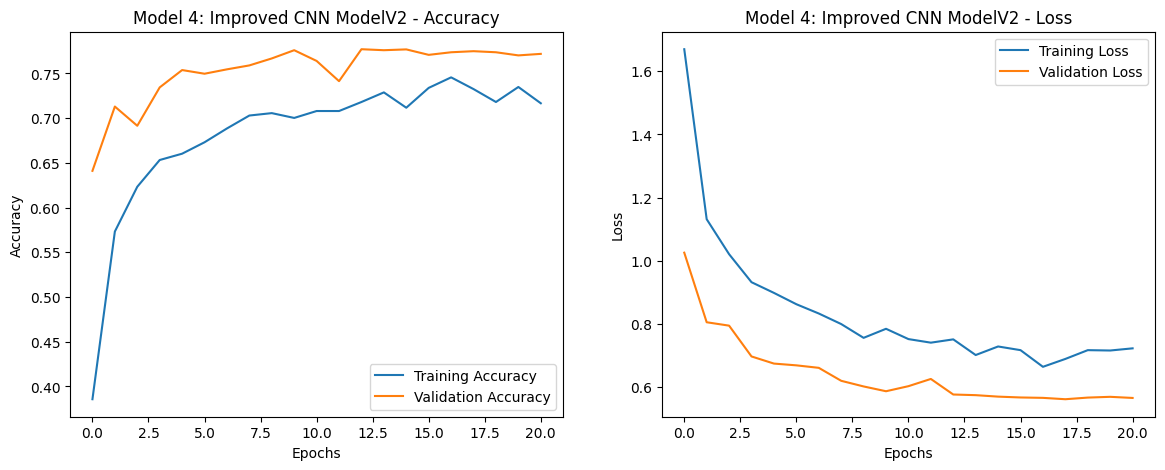

In [166]:
# Using the plot_accuracy_loss pipeline function to display the accuracy and loss of the model
plot_accuracy_loss(improved_model_historyV2, 'Model 4: Improved CNN ModelV2')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


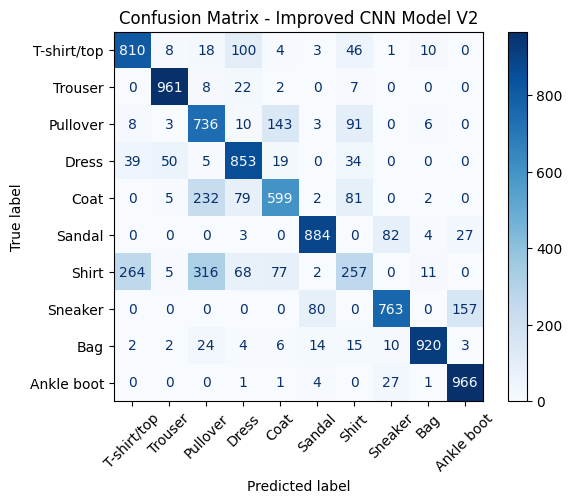

In [167]:
plot_confusion_matrix(
    model=improved_modelV2, # The trained model to evaluate (in this case, the second CNN model)
    x_test=x_test_improved, # The preprocessed test features (input data) for evaluation
    y_test=y_test_improved, # The true labels for the test data, in integer format (not one-hot encoded)
    class_names=class_names, # List of class names corresponding to the integer labels
    title="Confusion Matrix - Improved CNN Model V2" # Title for the plot to describe which model the matrix corresponds to
)

In [168]:
# Ending spark session after analysis is complete
fashion_session.stop()